In [ ]:
appname = "Logistic Regression - Documentation example"

# Look into https://spark.apache.org/downloads.html for the latest version
spark_mirror = "https://mirrors.sonic.net/apache/spark"
spark_version = "3.3.1"
hadoop_version = "3"

# Install Java 8 (Spark does not work with newer Java versions)
! apt-get update
! apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download and extract Spark binary distribution
! rm -rf spark-{spark_version}-bin-hadoop{hadoop_version}.tgz spark-{spark_version}-bin-hadoop{hadoop_version}
! wget -q {spark_mirror}/spark-{spark_version}/spark-{spark_version}-bin-hadoop{hadoop_version}.tgz
! tar xzf spark-{spark_version}-bin-hadoop{hadoop_version}.tgz

# The only 2 environment variables needed to set up Java and Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/spark-{spark_version}-bin-hadoop{hadoop_version}"

# Set up the Spark environment based on the environment variable SPARK_HOME 
! pip install -q findspark
import findspark
findspark.init()

# Get the Spark session object (basic entry point for every operation)
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName(appname).master("local[*]").getOrCreate()

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.co

In [ ]:
spark

In [ ]:
#DOWNLOAD AND READ THE FILES
from google.colab import files 
  
  
logistic_regresion = files.upload()

Saving customer_churn.csv to customer_churn.csv


In [ ]:
df = spark.read.options(inferSchema=True, header=True).csv('customer_churn.csv')
df.show()

+-------------------+----+--------------+---------------+-----+---------+-------------------+--------------------+--------------------+-----+
|              Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|       Onboard_date|            Location|             Company|Churn|
+-------------------+----+--------------+---------------+-----+---------+-------------------+--------------------+--------------------+-----+
|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|2013-08-30 07:00:40|10265 Elizabeth M...|          Harvey LLC|    1|
|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|2013-08-13 00:38:46|6157 Frank Garden...|          Wilson PLC|    1|
|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|2016-06-29 06:20:07|1331 Keith Court ...|Miller, Johnson a...|    1|
|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|2014-04-22 12:43:12|13120 Daniel Moun...|           Smith Inc|    1|
|     

In [ ]:
df.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Churn: integer (nullable = true)



In [ ]:
#SELECT THE COLUMNS WE ARE INTERESTED IN
cols = df.select(['Age', 'Total_Purchase', 'Years', 'Num_Sites', 'Churn'])
df2 = cols.na.drop()
df2.show()

+----+--------------+-----+---------+-----+
| Age|Total_Purchase|Years|Num_Sites|Churn|
+----+--------------+-----+---------+-----+
|42.0|       11066.8| 7.22|      8.0|    1|
|41.0|      11916.22|  6.5|     11.0|    1|
|38.0|      12884.75| 6.67|     12.0|    1|
|42.0|       8010.76| 6.71|     10.0|    1|
|37.0|       9191.58| 5.56|      9.0|    1|
|48.0|      10356.02| 5.12|      8.0|    1|
|44.0|      11331.58| 5.23|     11.0|    1|
|32.0|       9885.12| 6.92|      9.0|    1|
|43.0|       14062.6| 5.46|     11.0|    1|
|40.0|       8066.94| 7.11|     11.0|    1|
|30.0|      11575.37| 5.22|      8.0|    1|
|45.0|       8771.02| 6.64|     11.0|    1|
|45.0|       8988.67| 4.84|     11.0|    1|
|40.0|       8283.32|  5.1|     13.0|    1|
|41.0|       6569.87|  4.3|     11.0|    1|
|38.0|      10494.82| 6.81|     12.0|    1|
|45.0|       8213.41| 7.35|     11.0|    1|
|43.0|      11226.88| 8.08|     12.0|    1|
|53.0|       5515.09| 6.85|      8.0|    1|
|46.0|        8046.4| 5.69|     

In [ ]:
rc=df2.toPandas()

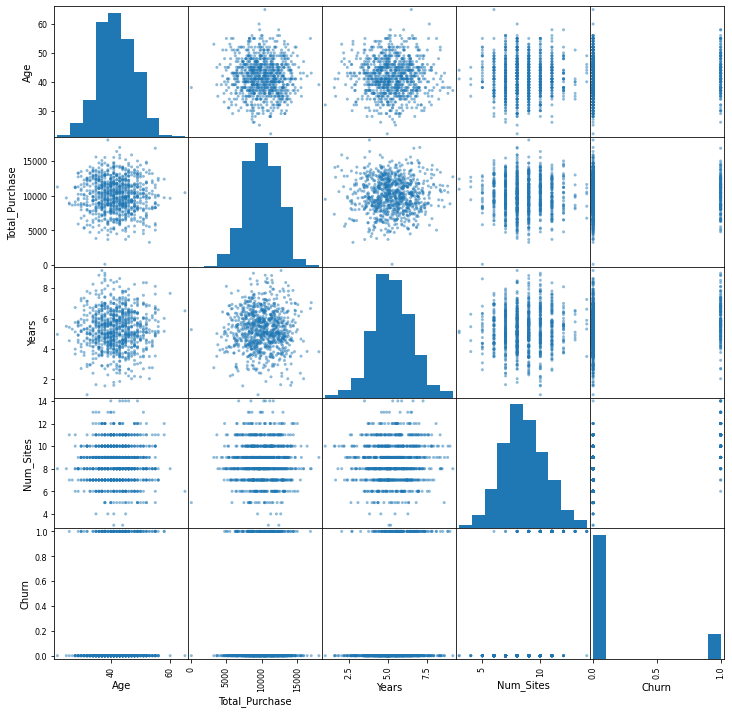

In [ ]:
#COMPARATIVE PLOT
import pandas as pd
pd.plotting.scatter_matrix(rc,figsize=(12,12));

if we look at our column of interest, churn, we will observe that the values are between 0 and 1, this is because churn is a binary classification, that is why we cannot use a linear model here.

In [ ]:
#VECTORASSEMBLER ASSEMBLES ALL THE FEATURES INTO ONE VECTOR FROM MULTIPLE COLUMNS THAT CONTAIN TYPE DOUBLE. 
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['Age', 'Total_Purchase', 'Years', 'Num_Sites'], outputCol = 'features')
output = assembler.transform(df2)
output.show()

+----+--------------+-----+---------+-----+--------------------+
| Age|Total_Purchase|Years|Num_Sites|Churn|            features|
+----+--------------+-----+---------+-----+--------------------+
|42.0|       11066.8| 7.22|      8.0|    1|[42.0,11066.8,7.2...|
|41.0|      11916.22|  6.5|     11.0|    1|[41.0,11916.22,6....|
|38.0|      12884.75| 6.67|     12.0|    1|[38.0,12884.75,6....|
|42.0|       8010.76| 6.71|     10.0|    1|[42.0,8010.76,6.7...|
|37.0|       9191.58| 5.56|      9.0|    1|[37.0,9191.58,5.5...|
|48.0|      10356.02| 5.12|      8.0|    1|[48.0,10356.02,5....|
|44.0|      11331.58| 5.23|     11.0|    1|[44.0,11331.58,5....|
|32.0|       9885.12| 6.92|      9.0|    1|[32.0,9885.12,6.9...|
|43.0|       14062.6| 5.46|     11.0|    1|[43.0,14062.6,5.4...|
|40.0|       8066.94| 7.11|     11.0|    1|[40.0,8066.94,7.1...|
|30.0|      11575.37| 5.22|      8.0|    1|[30.0,11575.37,5....|
|45.0|       8771.02| 6.64|     11.0|    1|[45.0,8771.02,6.6...|
|45.0|       8988.67| 4.8

In [ ]:
compared_data = output.select("features","churn")
compared_data.show()

+--------------------+-----+
|            features|churn|
+--------------------+-----+
|[42.0,11066.8,7.2...|    1|
|[41.0,11916.22,6....|    1|
|[38.0,12884.75,6....|    1|
|[42.0,8010.76,6.7...|    1|
|[37.0,9191.58,5.5...|    1|
|[48.0,10356.02,5....|    1|
|[44.0,11331.58,5....|    1|
|[32.0,9885.12,6.9...|    1|
|[43.0,14062.6,5.4...|    1|
|[40.0,8066.94,7.1...|    1|
|[30.0,11575.37,5....|    1|
|[45.0,8771.02,6.6...|    1|
|[45.0,8988.67,4.8...|    1|
|[40.0,8283.32,5.1...|    1|
|[41.0,6569.87,4.3...|    1|
|[38.0,10494.82,6....|    1|
|[45.0,8213.41,7.3...|    1|
|[43.0,11226.88,8....|    1|
|[53.0,5515.09,6.8...|    1|
|[46.0,8046.4,5.69...|    1|
+--------------------+-----+
only showing top 20 rows



In [ ]:
#CREATING THE MODEL
(train, test) = df2.randomSplit([0.7,0.3])

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol='features', labelCol='Churn')

In [ ]:
#A pipeline is a means of automating the machine learning workflow by enabling data 
#to be transformed and correlated into a model that can then be analyzed to achieve outputs
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[assembler, lr])

In [ ]:
model = pipeline.fit(train)

In [ ]:
#model.stages[1].summary.accuracy

0.9083333333333333

In [ ]:
test1=test.na.drop()
predictions = model.transform(test1)

In [ ]:
predictions.show()

+----+--------------+-----+---------+-----+--------------------+--------------------+--------------------+----------+
| Age|Total_Purchase|Years|Num_Sites|Churn|            features|       rawPrediction|         probability|prediction|
+----+--------------+-----+---------+-----+--------------------+--------------------+--------------------+----------+
|25.0|       9672.03| 5.49|      8.0|    0|[25.0,9672.03,5.4...|[4.56893074511928...|[0.98973737266314...|       0.0|
|27.0|        8628.8|  5.3|      7.0|    0|[27.0,8628.8,5.3,...|[5.88112450680163...|[0.99721612729597...|       0.0|
|29.0|       5900.78| 5.56|      8.0|    0|[29.0,5900.78,5.5...|[4.33210633713723...|[0.98703057480468...|       0.0|
|29.0|       9617.59| 5.49|      8.0|    0|[29.0,9617.59,5.4...|[4.35678945587953...|[0.98734277981568...|       0.0|
|29.0|      11274.46| 4.43|      8.0|    0|[29.0,11274.46,4....|[4.98791712467533...|[0.99322634075539...|       0.0|
|30.0|       7960.64| 2.72|     10.0|    1|[30.0,7960.64

In [ ]:
#ACCURACY OF THE MODEL
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='Churn')

In [ ]:
evaluator.evaluate(predictions)

0.7379595326303791

They are not the best values, maybe our model can be improved or maybe our base data does not allow us to create a better model.
